In [1]:
import ROOT
from ROOT import TFile, TTree, TH1F, TCanvas, TAxis, TLegend, THStack
import copy
import math
ROOT.gStyle.SetOptStat(0)
ROOT.disableJSVis()

Welcome to JupyROOT 6.22/06


Name: Res1ToRes2GluTo3Glu_M1-3000_R-0p3_dijet_eta Title: #eta_{jj} NbinsX: 100
Name: Res1ToRes2GluTo3Glu_M1-3000_R-0p3_dR_jj Title: #Delta R_{jj} NbinsX: 100
Name: Res1ToRes2GluTo3Glu_M1-3000_R-0p3_dEta_jj Title: #Delta #eta_{jj} NbinsX: 100
Name: Res1ToRes2GluTo3Glu_M1-3000_R-0p3_dPhi_jj Title: #Delta #phi_{jj} NbinsX: 100
Name: Res1ToRes2GluTo3Glu_M1-3000_R-0p3_dR_j0j2 Title: #Delta R_{j0j2} NbinsX: 100
Name: Res1ToRes2GluTo3Glu_M1-3000_R-0p3_dEta_j0j2 Title: #Delta #eta_{j0j2} NbinsX: 100
Name: Res1ToRes2GluTo3Glu_M1-3000_R-0p3_dPhi_j0j2 Title: #Delta #phi_{j0j2} NbinsX: 100
Name: Res1ToRes2GluTo3Glu_M1-3000_R-0p3_dR_j1j2 Title: #Delta R_{j1j2} NbinsX: 100
Name: Res1ToRes2GluTo3Glu_M1-3000_R-0p3_dEta_j1j2 Title: #Delta #eta_{j1j2} NbinsX: 100
Name: Res1ToRes2GluTo3Glu_M1-3000_R-0p3_dPhi_j1j2 Title: #Delta #phi_{j1j2} NbinsX: 100
Name: Res1ToRes2GluTo3Glu_M1-3000_R-0p3_jet_eta_0 Title: #eta_{j0} NbinsX: 100
Name: Res1ToRes2GluTo3Glu_M1-3000_R-0p3_jet_ptoverm_0 Title: p^{j0}_{T}/m_{jj

Warning in <TCanvas::Constructor>: Deleting canvas with same name: dijet_eta
Warning in <TCanvas::Constructor>: Deleting canvas with same name: dR_jj
Warning in <TCanvas::Constructor>: Deleting canvas with same name: dEta_jj
Warning in <TCanvas::Constructor>: Deleting canvas with same name: dPhi_jj
Warning in <TCanvas::Constructor>: Deleting canvas with same name: dR_j0j2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: dEta_j0j2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: dPhi_j0j2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: dR_j1j2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: dEta_j1j2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: dPhi_j1j2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: jet_eta_0
Warning in <TCanvas::Constructor>: Deleting canvas with same name: jet_ptoverm_0
Warning in <TCanvas::Constructor>: Deleting canvas with same name: jet_eta_1
Warning

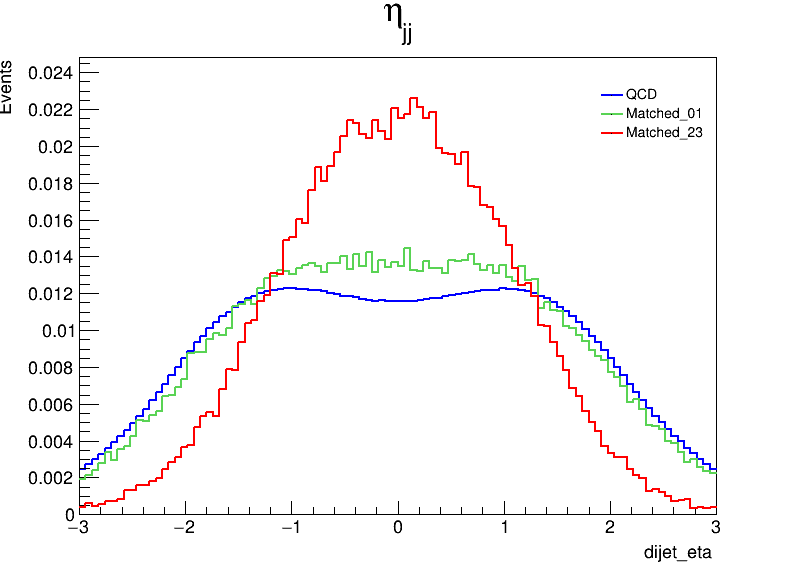

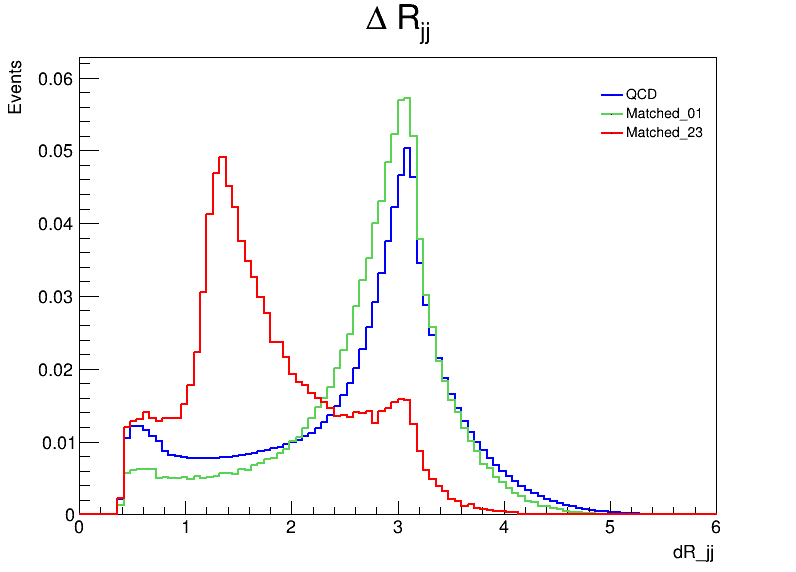

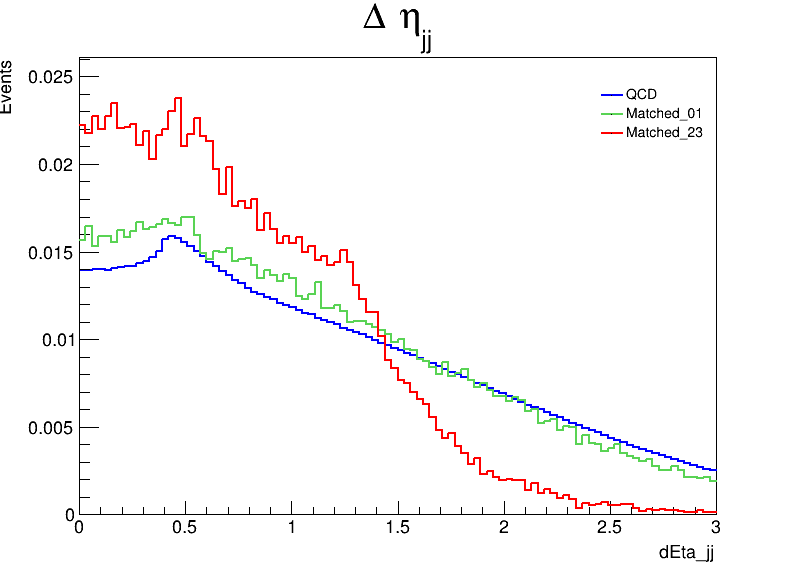

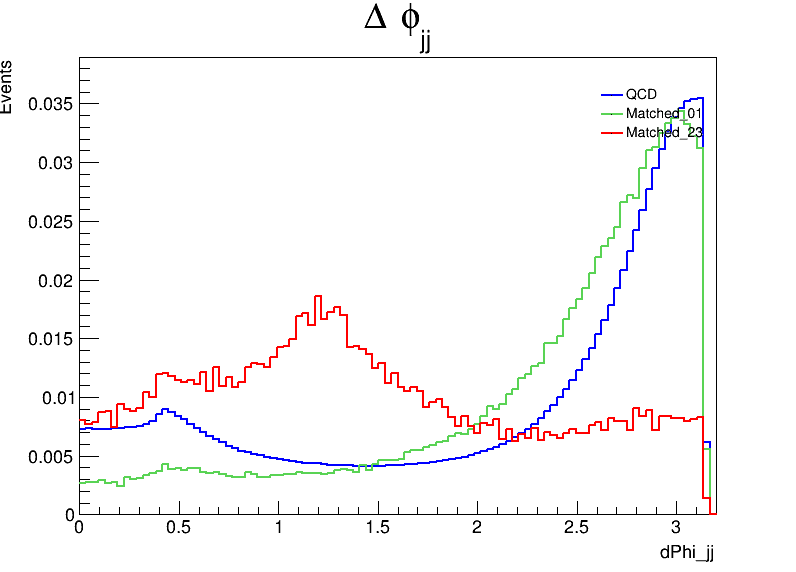

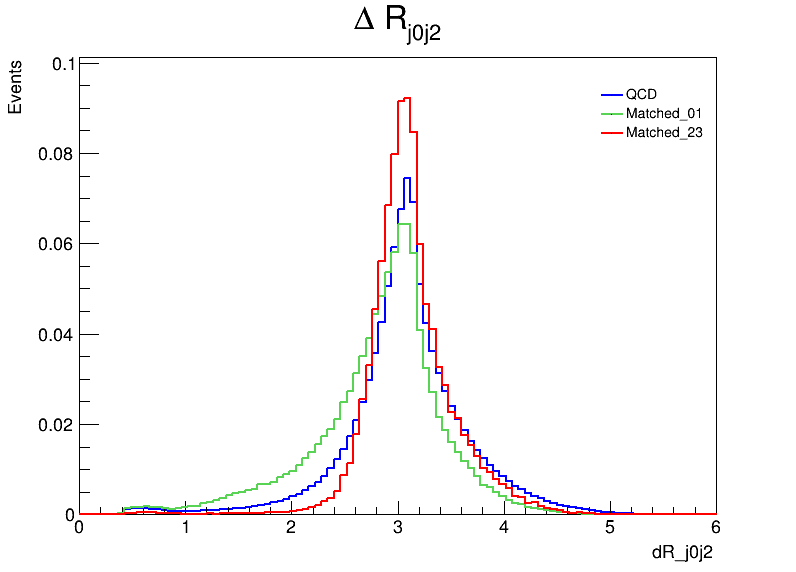

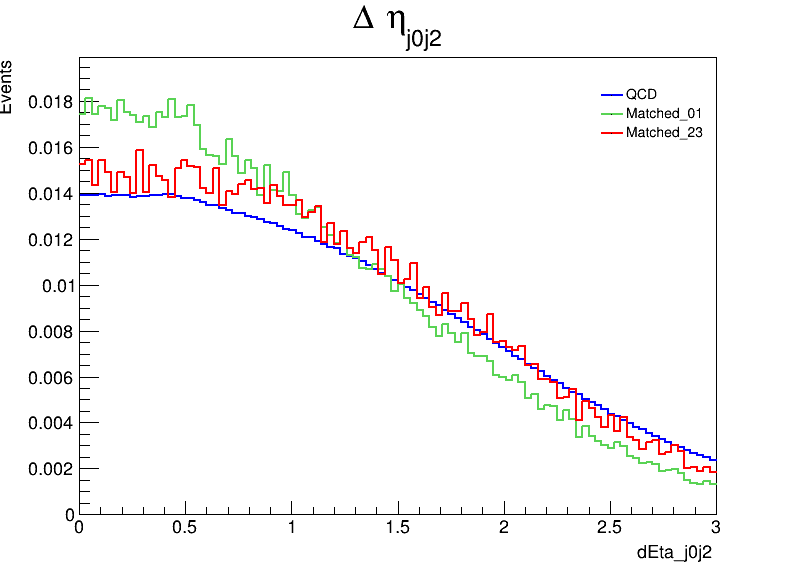

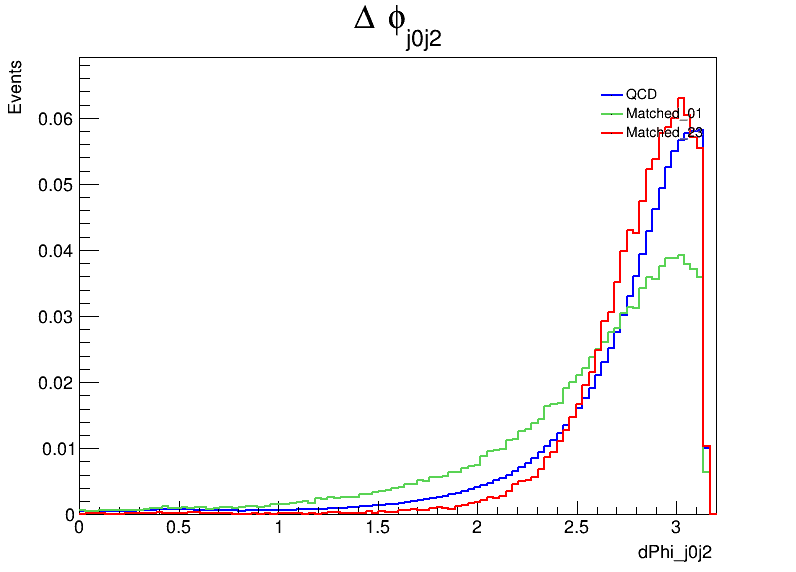

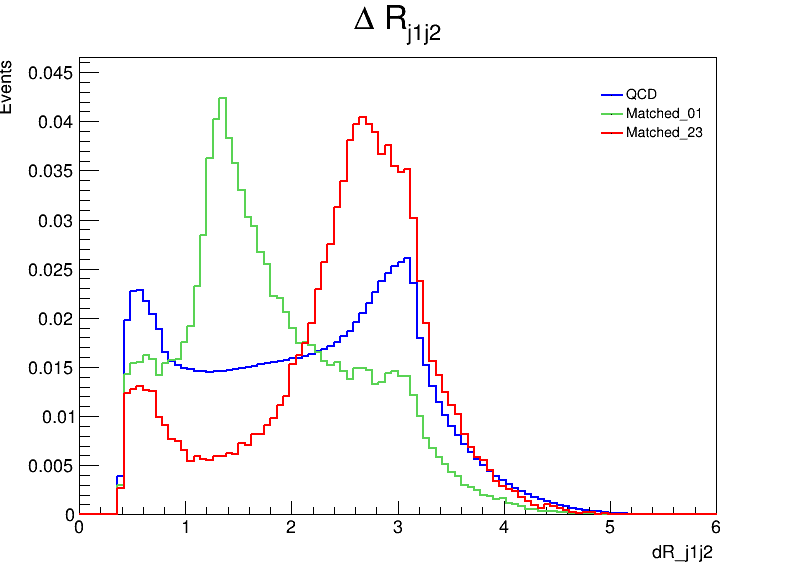

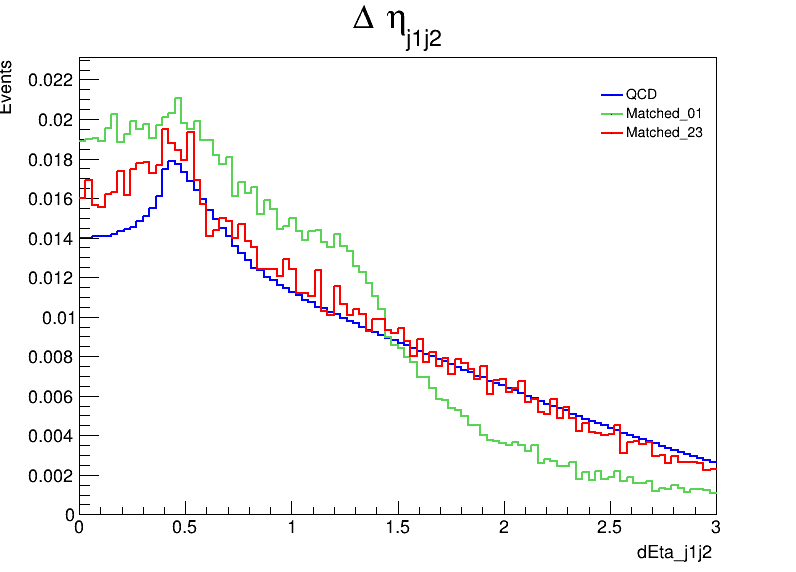

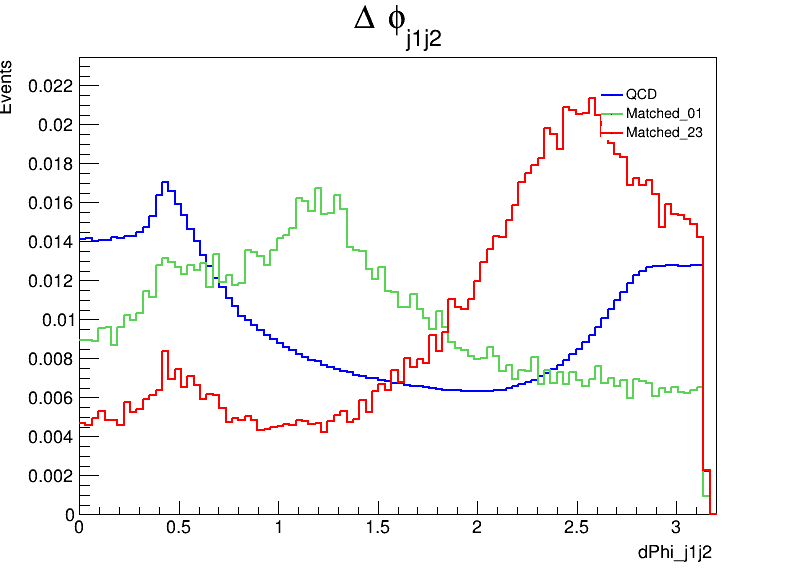

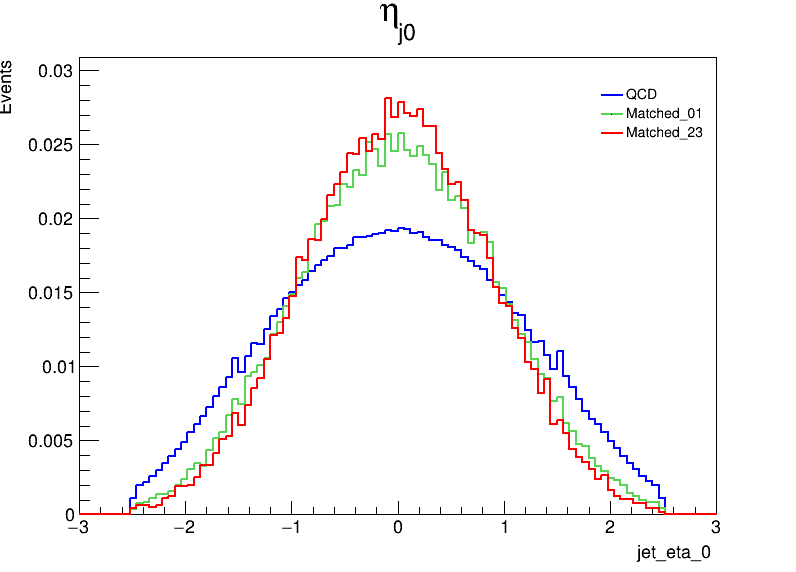

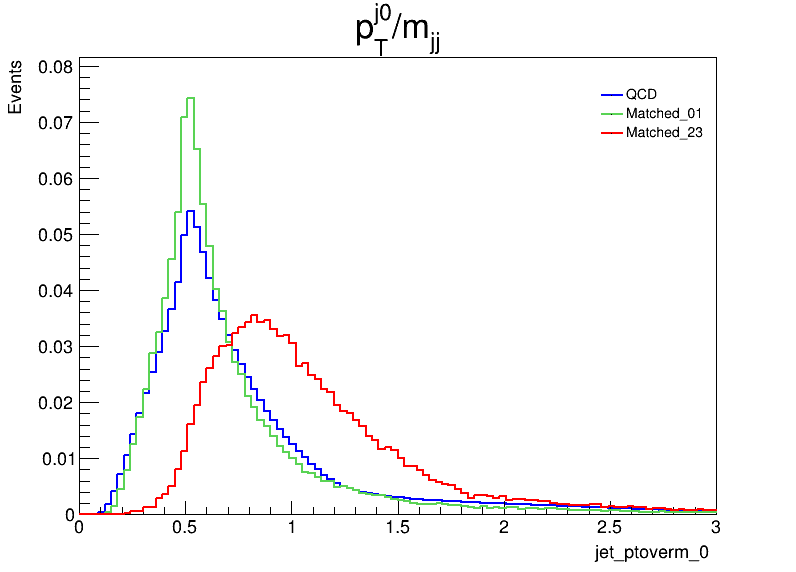

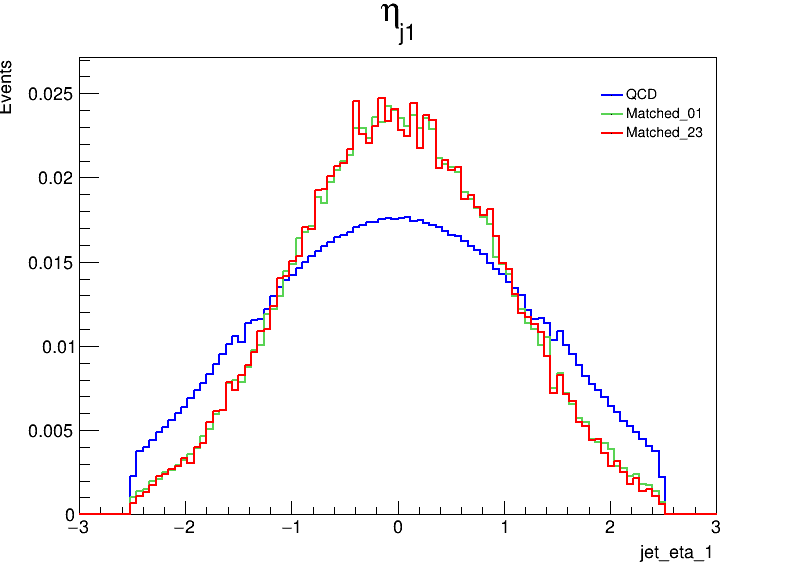

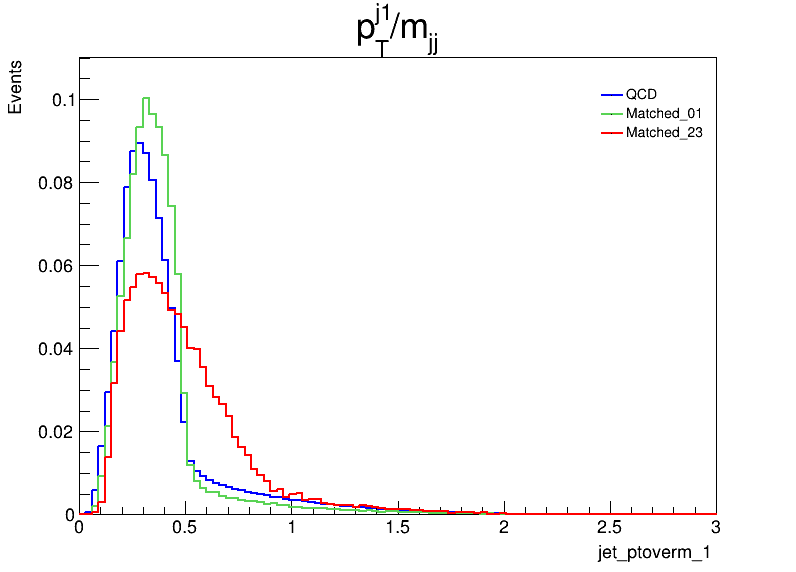

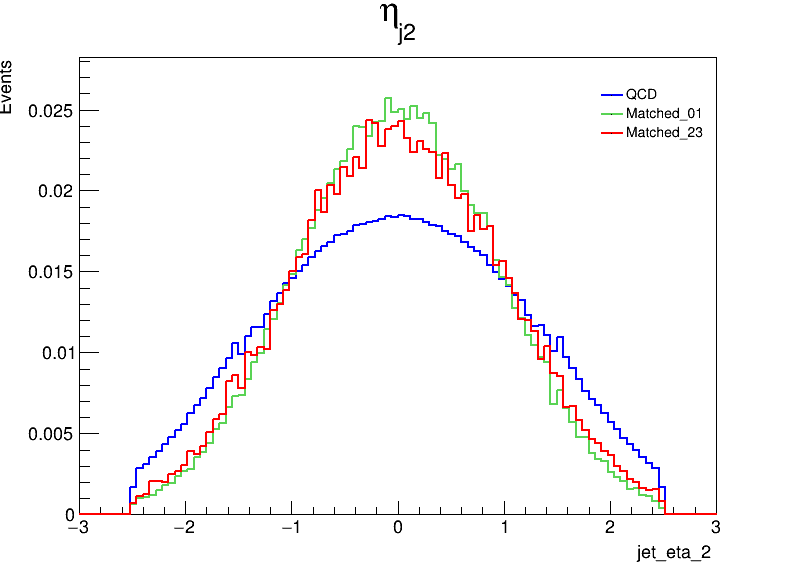

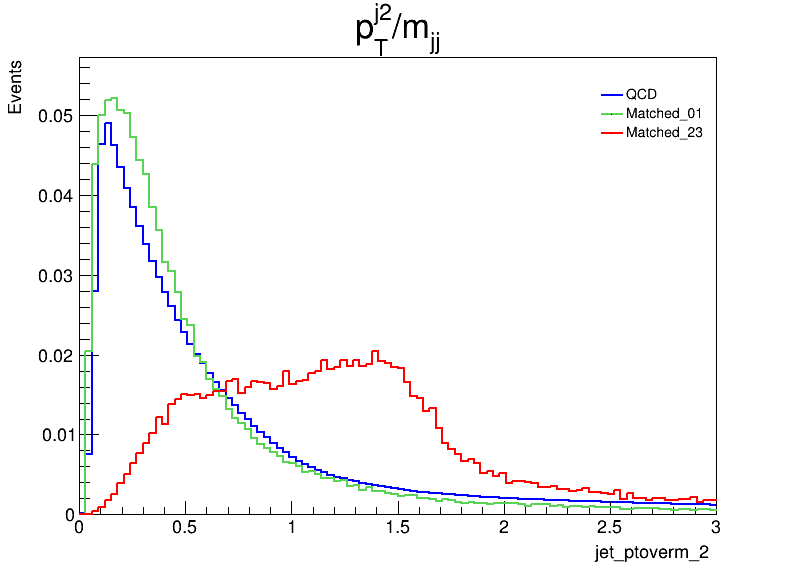

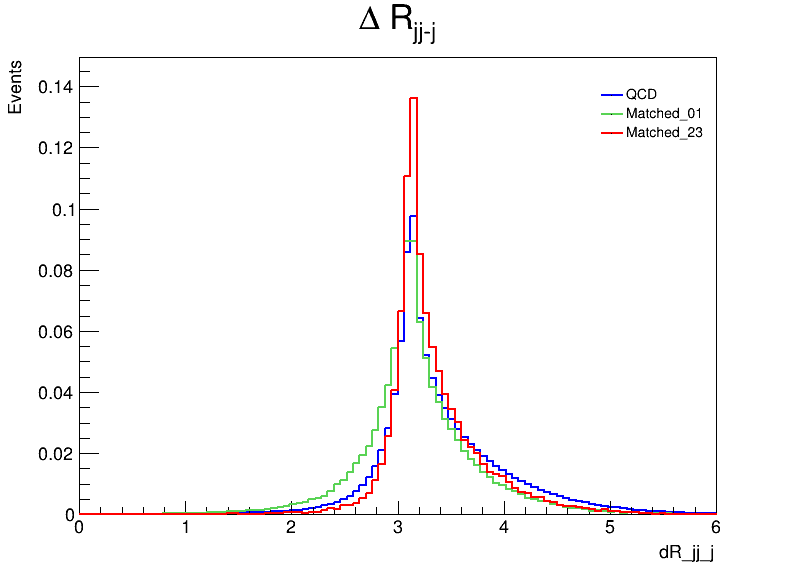

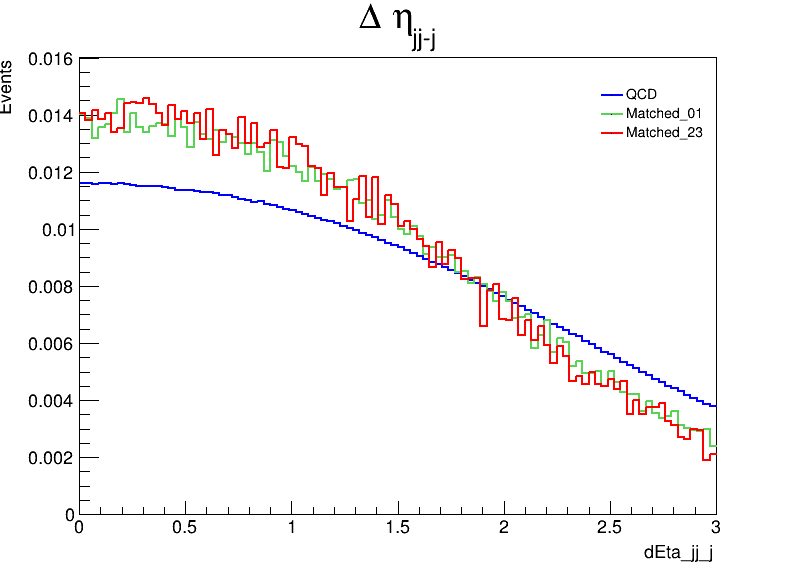

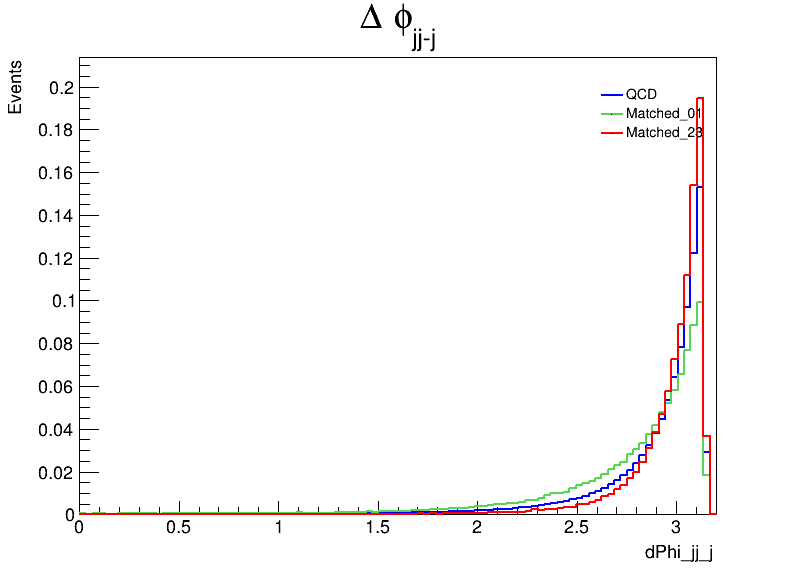

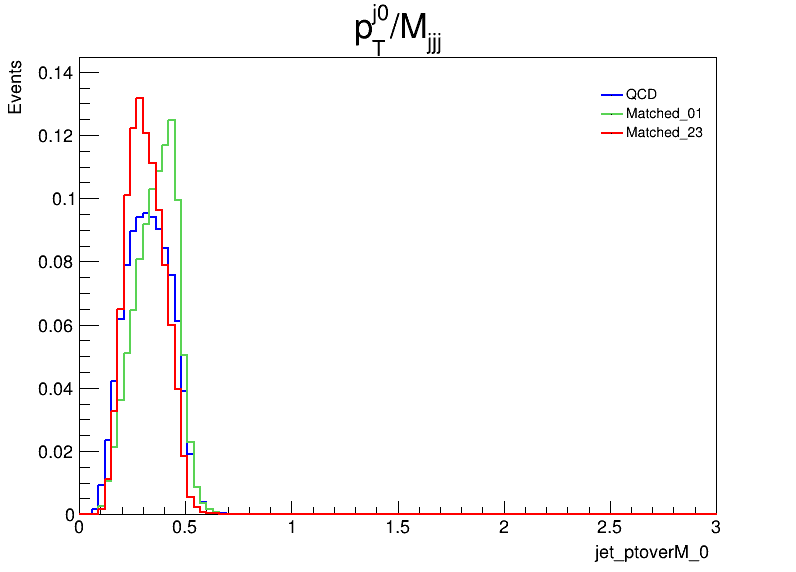

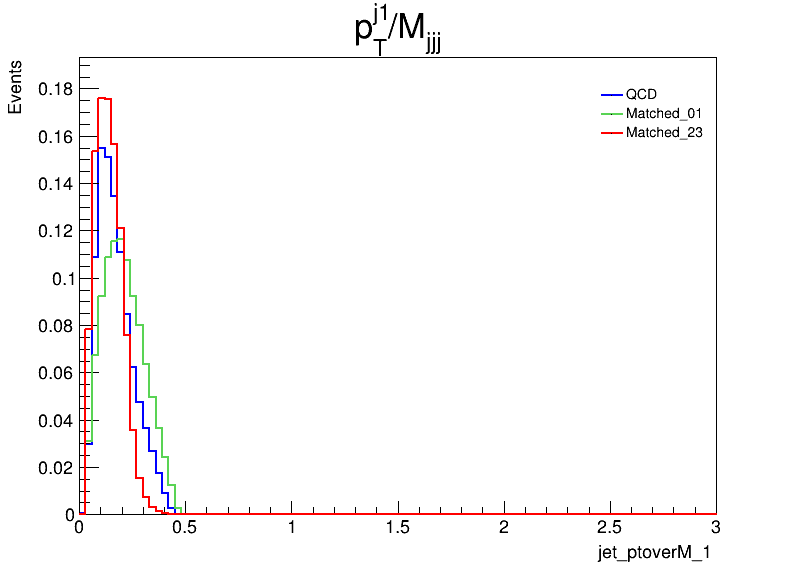

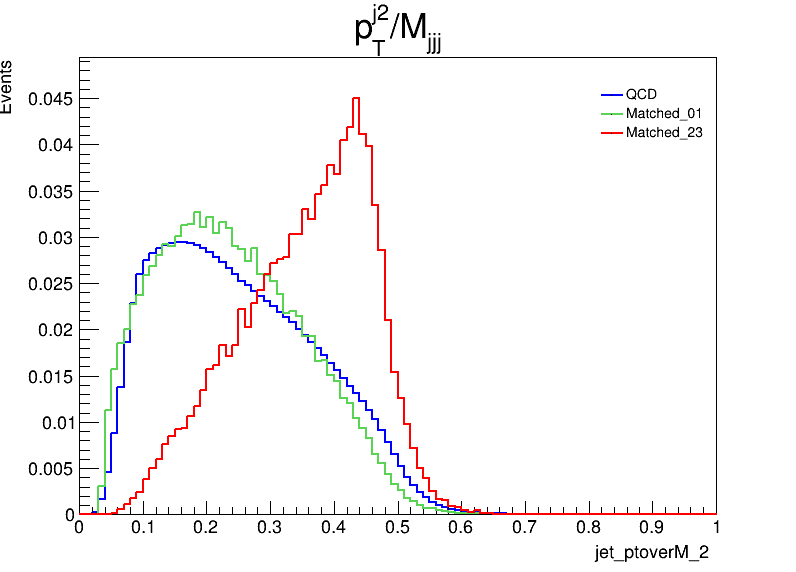

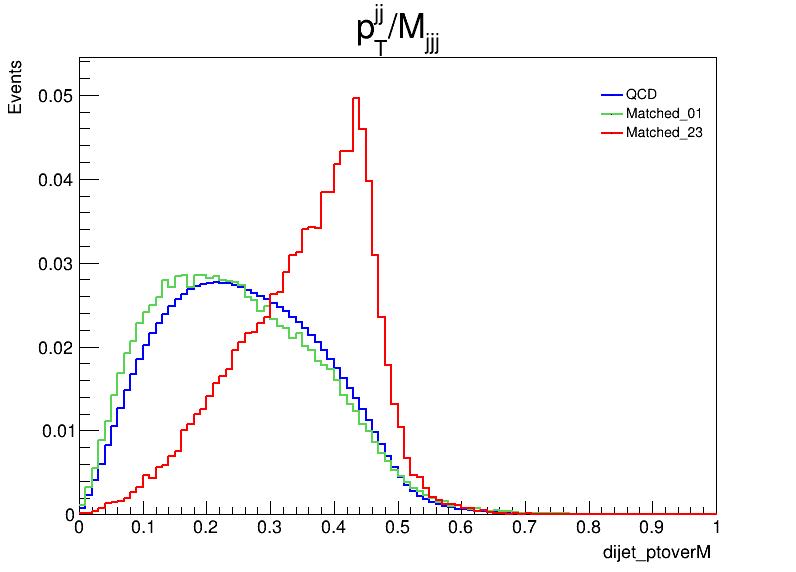

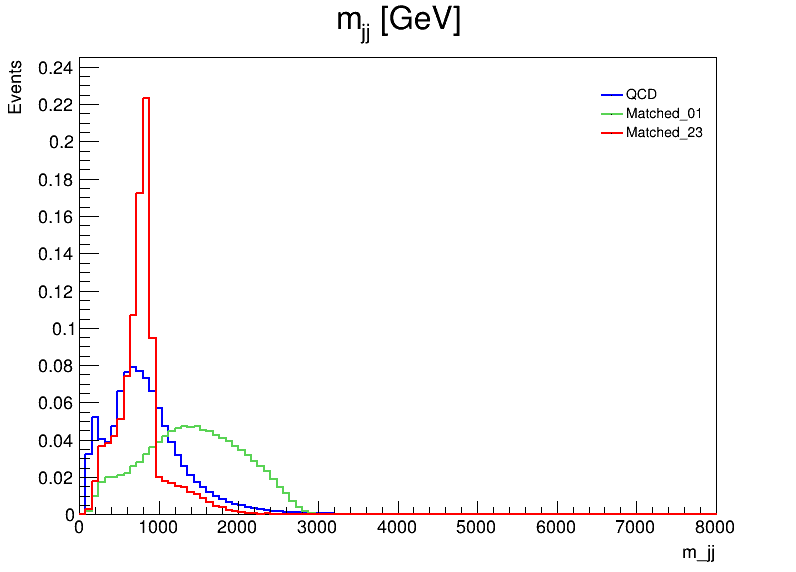

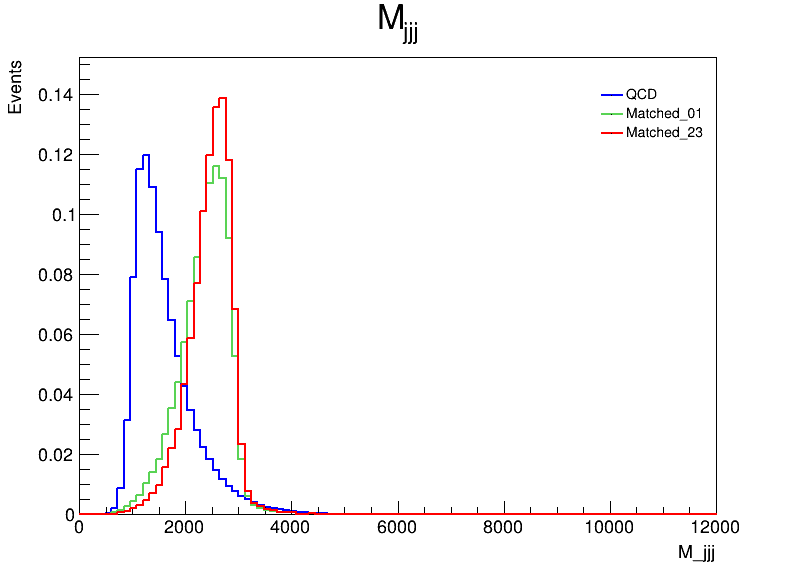

In [3]:
# UnStacked plot
def getRangeY(hist):
    global y_upper
    entries = [hist.GetBinContent(i) for i in range(1,hist.GetNbinsX())]
    max_entry = max(entries)
    print(max_entry, y_upper)
    if max_entry*1.1 > y_upper:
        y_upper = max_entry * 1.1
def plot(h_plot, canvas, leg, lcolor, lstyle, xtitle, dopt, hlabel):
    global y_upper
    h_plot.SetLineWidth(2)
    h_plot.SetLineColor(lcolor)
    h_plot.SetLineStyle(lstyle)
    h_plot.Draw(dopt)
    h_plot.GetXaxis().SetTitle(xtitle)
    h_plot.GetXaxis().SetTitleOffset(1.2)
    h_plot.GetYaxis().SetTitle("Events")
    h_plot.GetYaxis().SetRangeUser(0,y_upper)
    leg.AddEntry(h_plot,hlabel)
    
hist_dic = {}
file_list = []
var2plot = ["dijet_eta", "dR_jj", "dEta_jj", "dPhi_jj", "dR_j0j2", "dEta_j0j2", "dPhi_j0j2", "dR_j1j2", "dEta_j1j2", "dPhi_j1j2", "jet_eta_0", 
 "jet_ptoverm_0", "jet_eta_1", "jet_ptoverm_1", "jet_eta_2", "jet_ptoverm_2", "dR_jj_j", "dEta_jj_j", "dPhi_jj_j", "jet_ptoverM_0", 
 "jet_ptoverM_1", "jet_ptoverM_2", "dijet_ptoverM","m_jj","M_jjj"]
bkg_list = ["QCD_Pt_300to470","QCD_Pt_470to600","QCD_Pt_600to800","QCD_Pt_800to1000","QCD_Pt_1000to1400","QCD_Pt_1400to1800",
               "QCD_Pt_1800to2400","QCD_Pt_2400to3200","QCD_Pt_3200toInf"]
hist_dic["QCD"] = {}
for i, sample in enumerate(bkg_list):
    file = TFile.Open(f"/home/xyan13/Trijet/TrijetAna/TrijetAna/ML_study_v2/histograms/{sample}_histos.root")
    file_list.append(file)
    for var in var2plot:
        if(i == 0):
            hist_dic["QCD"][var] = file.Get(f"{sample}_{var}")
        else:
            hist = file.Get(f"{sample}_{var}")
            hist_dic["QCD"][var].Add(hist)
            
sig_list = ["Res1ToRes2GluTo3Glu_M1-3000_R-0p3_match_01","Res1ToRes2GluTo3Glu_M1-3000_R-0p3_match_23"]
for sample in sig_list:
    file = TFile.Open(f"/home/xyan13/Trijet/TrijetAna/TrijetAna/ML_study_v2/histograms/{sample}_histos.root")
    file_list.append(file)
    hist_dic[sample] = {}
    for var in var2plot:
        name = sample.split("_match")[0]
        hist = file.Get(f"{name}_{var}")
        print(hist)
        hist_dic[sample][var] = hist

sample_list = ["QCD","Res1ToRes2GluTo3Glu_M1-3000_R-0p3_match_01","Res1ToRes2GluTo3Glu_M1-3000_R-0p3_match_23"]
label_list = ["QCD","Matched_01","Matched_23"]
nvar = len(hist_dic.keys())
nrow = math.ceil(nvar/3)
color_dic = {"QCD":4, "Res1ToRes2GluTo3Glu_M1-3000_R-0p3_match_01":8, "Res1ToRes2GluTo3Glu_M1-3000_R-0p3_match_23":2}
plot_list = []
leg_list = []
plot_name_list = []

for variable in var2plot:
    c = TCanvas(variable,"",800,600)
    leg = TLegend(0.75,0.75,0.90,0.85)
    leg.SetBorderSize(0)
    leg.SetFillStyle(0)
    y_upper = 0
    for sample in sample_list:
        hist = hist_dic[sample][variable]
        hist.Scale(1.0/hist.GetEntries())
        print(variable)
        getRangeY(hist)
    for i, sample in enumerate(sample_list):
        hist = hist_dic[sample][variable]
        plot(h_plot=hist, canvas=c, leg=leg, lcolor=color_dic[sample], lstyle=1, xtitle=variable, dopt="HIST SAME", hlabel=label_list[i])
    plot_list.append(c)
    leg_list.append(leg)
    plot_name_list.append(variable)
        
for i in range(0,len(plot_list)):
    plot_list[i].cd()
#     plot_list[i].SetLogy()
    leg_list[i].Draw()
    plot_list[i].Draw()
    plot_list[i].Print(f"{plot_name_list[i]}.png")